<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descripción-del-proyecto" data-toc-modified-id="Descripción-del-proyecto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descripción del proyecto</a></span><ul class="toc-item"><li><span><a href="#Descripción-de-los-datos" data-toc-modified-id="Descripción-de-los-datos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Descripción de los datos</a></span></li></ul></li><li><span><a href="#Exploración-de-datos" data-toc-modified-id="Exploración-de-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploración de datos</a></span><ul class="toc-item"><li><span><a href="#Importación-de-librerías-y-descarga-de-base-de-datos" data-toc-modified-id="Importación-de-librerías-y-descarga-de-base-de-datos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importación de librerías y descarga de base de datos</a></span></li><li><span><a href="#Exploración-y-tratamiento-de-datos" data-toc-modified-id="Exploración-y-tratamiento-de-datos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exploración y tratamiento de datos</a></span></li></ul></li><li><span><a href="#Construcción-de-modelo-para-predecir-la-cancelación-de-usuarios." data-toc-modified-id="Construcción-de-modelo-para-predecir-la-cancelación-de-usuarios.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Construcción de modelo para predecir la cancelación de usuarios.</a></span></li><li><span><a href="#Creación-de-clústeres-de-usuarios" data-toc-modified-id="Creación-de-clústeres-de-usuarios-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creación de clústeres de usuarios</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

# Proyecto sprint 12: cadena de gimnasios.


## Descripción del proyecto

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. Con el fin de combatir la cancelación, el gimnasio ha digitalizado varios perfiles de sus clientes para facilitar el análisis. Durante este proyecto, analizaré su base de datos y elaboraré una estrategia de retención de clientes.

Para llevar a cabo dichas acciones, primero contruiré un modelo para predecir la cancelación de los usuarios y luego crearé clusters de usuarios donde analizaré los valores medios de características y calcularé la tasa de cancelación de los distintos clusters para identificar qué grupos son más propensos a irse y cuales no.

### Descripción de los datos

El gimnasio aportó un archivo CSV con los datos sobre cancelación de un mes en concreto e información del mes que lo precede.

El dataset incluye los siguientes campos:
- 'Churn' — la cancelación para el mes en cuestión

Campos de dataset actuales:
Datos de usuario del mes anterior
- 'gender'
- 'Near_Location' — si el usuario vive o trabaja en el vecindario donde se encuentra el gimnasio
- 'Partner' — si el usuario es un trabajador de una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes)
- Promo_friends — si el usuario originalmente se inscribió mediante una oferta "trae a un amigo" (se utilizó el código promocional de un amigo cuando pagaron el primer abono)
- 'Phone' — si el usuario aportó el número de teléfono
- 'Age'- edad.
- 'Lifetime' — el tiempo (en meses) desde que el usuario llegó por primera vez al gimnasio

Datos del registro de visitas y compras y datos sobre el estado actual de la membresía
- 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año
- 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato
- 'Group_visits' — si el usuario participa en sesiones grupales
- 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente
- 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana en el mes anterior
- 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

A continuación, daré comienzo a la exploración de los datos.


## Exploración de datos

### Importación de librerías y descarga de base de datos

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Genial que empecamos con el plan todo

In [ ]:
# Importación de librerias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

#Cargando drive, ya que el proyecto fue realizado en Google Colab y el archivo se encuentra en Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Descarga de datos
try:
  gym= pd.read_csv('gdrive/My Drive/Education/Practicum/Sprint 12/Project 12/gym_churn_us.csv')

except:
  #leyendo el archivo para el revisor de código de Practicum
  gym= pd.read_csv('/datasets/gym_churn_us.csv')

### Exploración y tratamiento de datos

In [ ]:
# Exploración de datos

gym.info()
gym.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
# Chequeo de valores ausentes

gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [ ]:
# Chequeo si hay valores duplicados

gym.duplicated().sum()

0

In [ ]:
# Miramos distribución de datos

gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [ ]:
# Transformo los nombres de columna a minúscula

gym= gym.rename(columns=str.lower)
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
# Miramos la relación entre los clientes que se quedan (o) y los clientes que se dan de baja (1)

gym['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

De los 4000 clientes que aparecen en el dataset de la cadena de gimnasios, aproximadamente el 26 % se dio de baja este mes.

In [ ]:
# Observamos los valores medios de las características para los que se fueron (1) y para los que se quedaron (0)

gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Buen inicio!

Como podemos observar en la tabla, los valores medios de los clientes que se dieron de baja son en algunos casos considerablemente menor a los que siguen como clientes.

A continuación voy a graficar las características del dataset para poder visualizar la relación entre ellas e identificar si hay algún patron.

In [ ]:
# Grafico características del dataset
plt.title('Distribución de características del dataset')
sns.pairplot(gym, hue='churn')


Output hidden; open in https://colab.research.google.com to view.

A continuación graficaré la característica 'contract_period' para tener una mejor visualización de los abonos que se ofrecen en el gimnasio al mismo tiempo observar la cantidad de clientes que se van y se quedan en cada una de ellas.

<Axes: title={'center': 'Abonos de gimnasio: clientes que se quedan y se van'}, xlabel='contract_period', ylabel='count'>

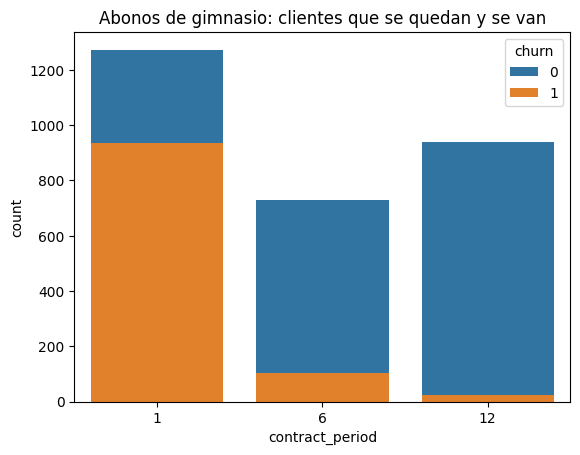

In [ ]:
# Grafico la característica 'Contract_period'
plt.title('Abonos de gimnasio: clientes que se quedan y se van')
sns.countplot(x='contract_period', hue='churn', data=gym, dodge=False)

<Axes: title={'center': 'Cantidad de veces que fueron los clientes por semana desde que se anotaron en el gimnasio'}, xlabel='avg_class_frequency_total', ylabel='Count'>

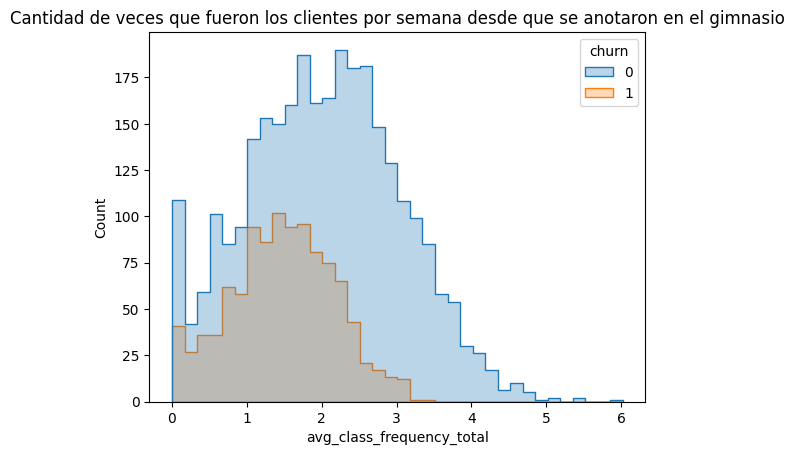

In [ ]:
# Grafico la cantidad de veces que fueron los clientes por semana desde que se anotaron en el gimnasio
plt.title('Cantidad de veces que fueron los clientes por semana desde que se anotaron en el gimnasio')
sns.histplot(data=gym, x='avg_class_frequency_total', hue='churn', element='step', alpha=0.3)

<Axes: title={'center': 'frecuencia de veces que fueron por semana en el último mes'}, xlabel='avg_class_frequency_current_month', ylabel='Count'>

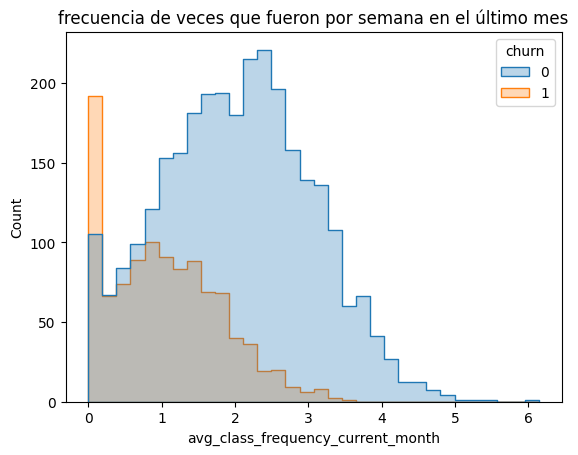

In [ ]:
# Grafico la frecuencia de veces que fueron por semana en el último mes
plt.title('frecuencia de veces que fueron por semana en el último mes')
sns.histplot(data=gym, x='avg_class_frequency_current_month', hue='churn', element='step', alpha=0.3)

<Axes: title={'center': 'meses que faltan hasta que expire el contrato'}, xlabel='month_to_end_contract', ylabel='Count'>

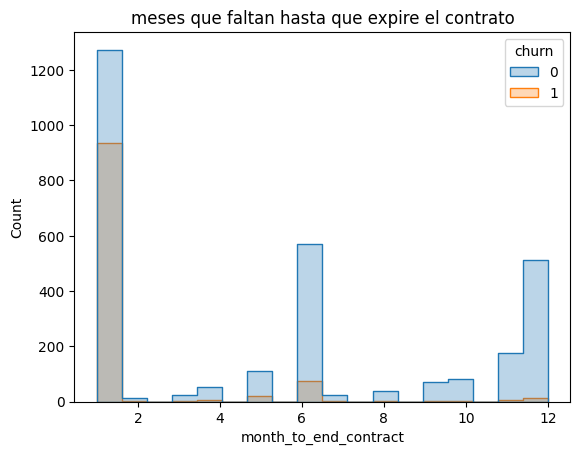

In [ ]:
# Grafico los meses que faltan hasta que expire el contrato.
plt.title('meses que faltan hasta que expire el contrato')
sns.histplot(data=gym, x='month_to_end_contract', hue='churn', element='step', alpha=0.3)

Como podemos observar en los gráficos, en rangos generales, el abono más contratado en el gimnasio es el abono mensual seguido por el anual. Al mismo tiempo, la mayoría de los clientes que se dan de baja tienen un abono mensual. Casi el 25% de las personas que se dan de baja no llega ni a utilizar el abono. El resto, lo usa pero van cada vez menos al gimnasio.

Por otro lado, el grupo que sigue en el gimnasio, podemos observar que aumentan la cantidad de veces que van por semana.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Aqui correcto!

In [ ]:
# Matriz de correlación
cor= gym.corr()
cor

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


In [ ]:
# Grafico correlación con mapa de calor

plt.figure(figsize= (15,15))
sns.heatmap(cor, annot= True, square= True)

NameError: ignored

<Figure size 1500x1500 with 0 Axes>

Como podemos observar en el mapa de calor, no hay una característca en particular que influya en la baja de los clientes. Sin embargo, podemos ver que hay otras características que sí estan fuertemente correlacionadas entre sí y que, producto de esa correlación, puede llevar a la baja de clientes.

Estas características correlacionadas son month to end contract con contract period y avg. class frequency total con avg. class frequency current month.

Al ser tan alta la correlación entre esas características, voy a eliminar una de cada grupo dado que nos puede causar inestabilidad en la estimación de coeficientes y capacidad predictiva cuando construya el modelo.

In [ ]:
# Elimino las caracteristicas correlacionadas

gym= gym.drop(['month_to_end_contract','avg_class_frequency_current_month'], axis= 1)
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0


## Construcción de modelo para predecir la cancelación de usuarios.

Antes de comenzar con la creación del modelo voy a transformar la columna 'contract_period' en variable binaria para poder utilizar el modelo correctamente.

In [ ]:
# Transformación de columna 'contract_period'

gym_ok= pd.get_dummies(gym, columns=['contract_period'])
gym_ok= gym_ok.drop('contract_period_12', axis= 1)
gym_ok.head()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,contract_period_1,contract_period_6
0,1,1,1,1,0,1,29,14.227470,3,0.020398,0,0,1
1,0,1,0,0,1,1,31,113.202938,7,1.922936,0,0,0
2,0,1,1,0,1,0,28,129.448479,2,1.859098,0,1,0
3,0,1,1,1,1,1,33,62.669863,2,3.205633,0,0,0
4,1,1,1,1,1,0,26,198.362265,3,1.113884,0,1,0


In [ ]:
# Defino la función para generar las métricas

def print_all_metrics(y_true, y_pred, y_proba, title= 'Métricas de clasificación'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))


# Divido los datos en características (matriz x) y una variable objetivo (y)
x= gym_ok.drop('churn', axis=1)
y= gym_ok['churn']

# Identificar las columnas numéricas continuas
numeric_cols = ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total']

 # Estandarizar solo las columnas numéricas continuas
x_numeric = x[numeric_cols]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_numeric)

# Unir las columnas estandarizadas con las columnas dicotómicas
x_scaled_df = pd.DataFrame(x_scaled, columns=numeric_cols, index=x.index)
x_scaled_df = pd.concat([x_scaled_df, x[x.columns[~x.columns.isin(numeric_cols)]]], axis=1) # seria mi nueva x!


# Divido los datos en conjuntos de entrenamiento y prueba
x_scaled_df_train, x_scaled_df_test, y_train, y_test= train_test_split(x_scaled_df, y, test_size= 0.2, random_state=0)


# Defino algoritmo del modelo
lr_model= LogisticRegression(random_state= 0)

# Entreno el modelo
lr_model.fit(x_scaled_df_train, y_train)

# Uso modelo entrenado para hacer previsiones
lr_probabilities= lr_model.predict_proba(x_scaled_df_test)[:,1]

# Hago la predicción
lr_predictions= lr_model.predict(x_scaled_df_test)

# Imprimo las métricas
print_all_metrics(y_test,lr_predictions, lr_probabilities, title= 'Metricas para regresión logística')


# Defino algoritmo para el nuevo modelo de random forest
rf_model= RandomForestClassifier(n_estimators= 100, random_state= 0)

# Entreno el modelo de random forest
rf_model.fit(x_scaled_df_train, y_train)

# Uso el modelo entrenado para hacer previsiones
rf_probabilities= rf_model.predict_proba(x_scaled_df_test)[:,1]

# Uso el modelo para hacer predicciones
rf_predictions= rf_model.predict(x_scaled_df_test)

# Imprimo las métricas
print_all_metrics(y_test,rf_predictions, rf_probabilities, title= 'Metricas para bosque aleatorio')

Metricas para regresión logística
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.80
Metricas para bosque aleatorio
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.77


En este caso, podemos observar que el accuracy y precision son muy parecidos. Sin embargo, como en el dataset tenemos un desbalance de clases, voy a enfocarme en la métrica de sensibilidad(recall). Podemos ver que el recall para el modelo de regresión logística es mejor que el del modelo de bosque aleatorio (0.80 vs. 0.77). Esto nos indica que el modelo de regresión logística nos ayudará a predecir mejor la cancelación de los clientes.  

A continuación buscaré cuales son los factores que tienen mayor influencia en la probabilidad de baja de clientes.

In [ ]:
# Busco cuales son los factores con mayor influencia en el abandono

# Crear un modelo de regresión logística
lr_m = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los datos
lr_m.fit(x_scaled_df, y)

# Recuperar los coeficientes de regresión
coeficientes = lr_m.coef_

# Imprimir los coeficientes de regresión
print(coeficientes)

[[-1.14277769 -0.53356152 -3.69972635 -0.68355535  0.06710444 -0.23644299
  -0.12745784 -0.41717069 -0.30227105 -0.75411276  2.90122436  1.30769649]]


In [ ]:
# Imprimo el df para facilitar la lectura de llos nombres de las columnas.
x_scaled_df.head()


,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,gender,near_location,partner,promo_friends,phone,group_visits,contract_period_1,contract_period_6
0,-0.056554,-1.377531,-0.193329,-1.911920,1,1,1,1,0,1,0,1
1,0.557327,-0.350213,0.873680,0.045176,0,1,0,0,1,1,0,0
2,-0.363494,-0.181592,-0.460081,-0.020493,0,1,1,0,1,0,1,0
3,1.171208,-0.874722,-0.460081,1.364655,0,1,1,1,1,1,0,0
4,-0.977375,0.533700,-0.193329,-0.787076,1,1,1,1,1,0,1,0


Podemos observar que la variable que tiene mayor influencia en la baja de clientes es 'contract_period_1', seguida por contract_period_6. El tipo de abono que contratan es la variable que tiene mayor influencia en la bajas de clientes. Cuando un cliente contrata un abono mensual, tiene altas probabilidades de irse.

## Creación de clústeres de usuarios

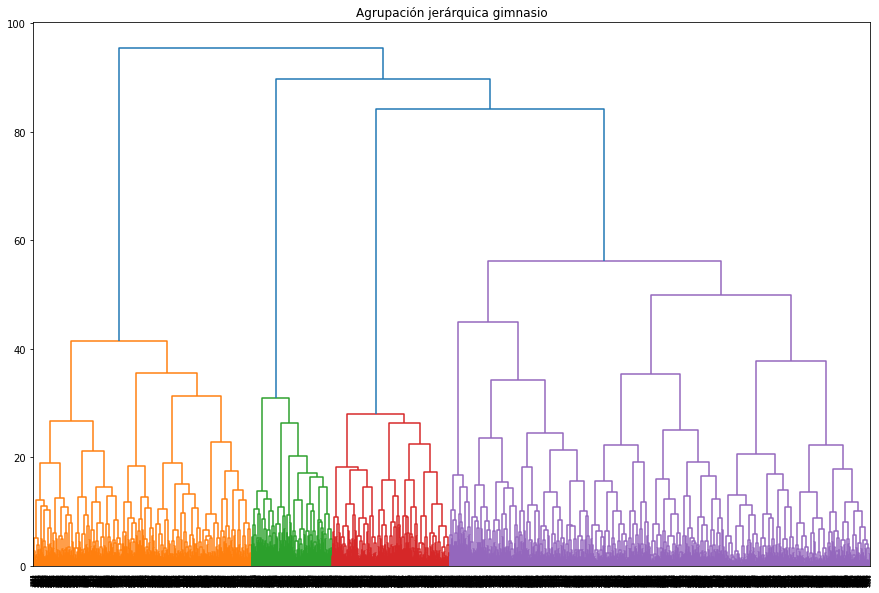

In [ ]:
# Primero estandarizo los datos
scaler= StandardScaler()
x_sc= scaler.fit_transform(gym.drop(columns= ['churn']))
linked= linkage(x_sc, method= 'ward')

# Visualizamos haciendo un dendograma
plt.figure(figsize= (15,10))
dendrogram(linked, orientation= 'top')
plt.title('Agrupación jerárquica gimnasio')
plt.show()

In [ ]:
    # Entreno el modelo usando k-means
    km= KMeans(n_clusters= 5)

    # Predecimos los clusters para las observaciones
    labels= km.fit_predict(x_sc)

    # Almaceno las etiquetas en nuestro conjunto de datos
    gym['cluster_km']= labels

    # Obtenemos los valores medios de característica para clusteres
    gym.groupby(['cluster_km']).mean()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839
1,0.543478,1.000000,0.254005,0.077803,1.0,4.566362,1.000000,29.549199,148.192561,3.792906,1.944280,0.200229
2,0.502024,1.000000,0.302834,0.053441,1.0,3.574899,0.000000,28.852632,146.510999,3.410526,1.836934,0.351417
3,0.491525,0.994703,0.948093,0.994703,1.0,7.175847,0.506356,29.508475,153.060621,4.379237,1.948344,0.132415
4,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287


In [ ]:
# Calculo tasa de cancelación para cada cluster

gym.groupby(['cluster_km']).mean()['churn']*100

cluster_km
0    26.683938
1    20.022883
2    35.141700
3    13.241525
4    39.928699
Name: churn, dtype: float64

Como podemos observar, el cluster 4 es el que tiene la tasa de cancelación más elevada con casi 40 %. Le sigue el cluster 2 con 35 %.

A continuación voy a mostrar como interactuan las variables de período de contratación con los distintos clusters.

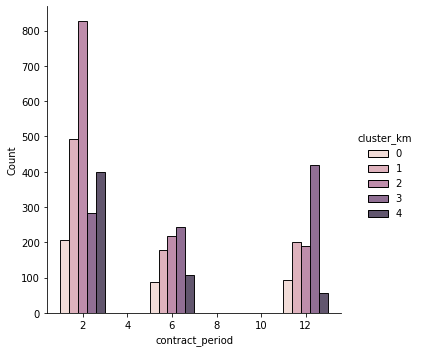

In [ ]:
# Grafico las características que tienen mayor incidencia en la baja de clientes por cluster

sns.displot(gym, x='contract_period', hue='cluster_km', multiple="dodge",binwidth=2)

<div class="alert alert-danger">
<b>❌ Comentario del revisor:</b> Te pido anadir el titulo al grafico

Como pudimos observar en las métricas, las variables que más influyen en la perdida de clientes son los períodos de contratación. Dentro de estos, el que tiene una mayor probabilidad de pérdida es el abono mensual. Los clientes de los clusters 4 y 2 son los más propensos a irse. En el gráfico de arriba, podemos ver que el abono mensual esta compuesto principalmente por clientes en los cluster 2 y tiene gran cantidad de clientes pertenecientes al cluster 4, los clusters que requieren mayor atención.

## Conclusiones

Para concluir, podemos decir que la principal característica que contribuye a la baja de clientes es el tipo de contratación que tienen. El abono más popular del gimnasio es el abono mensual. Sin embargo, dentro del 26% de clientes que perdió el gimnasio este mes, la mayoría pertenece a clientes que contratan el abono mensual y que una vez finalizado no fue renovado. (En algunos casos los abonos se contrataron pero casi no fueron usados) Durante ese mes de abono, no se llega a fidelizar el cliente. También hay clientes que se dan de baja que tienen contratados abonos de 6 y 12 meses aunque representan una cifra muy pequeña en comparación a las bajas del abono mensual.

Con los análisis realizados durante este proyecto, podemos observar que los clientes que se dieron de baja tuvieron un patron en común que fue que comenzaron a ir menos veces por semana al gimnasio. A pesar de que cuando arrancaron tampoco iban muchas veces, a medida que paso el mes empezaron a ir cada vez menos hasta que dejaron de ir o se termino su abono. Tampoco se caracterizaron por hacer mucho uso de las distintas actividades que ofrece el gimnasio ya que podemos observar que hicieron pocos gastos extra aparte del abono.

Sin duda una disminución en la cantidad de veces que los clientes usan el gimnasio y la poca interacción que tienen son puntos considerable a tener en cuanta especialmente si se encuentran dentro de las personas que contratan un abono mensual y pertenecen a los cluster 4 y 2 que son los clusters con tasa de cancelación más alta.

Basándonos en la información con la que contamos, algunas opciones para tratar de fidelizar al cliente y evitar que se dé de baja podrían ser: por un lado fomentar el uso de las actividades extra. Indagar en porqué no las usan. Quizás hay actividades que los clientes desconocen. Se podrían ofrecer abonos con ofertas especiales junto con el abono de las clases.
Una diferencia entre los grupos que dejan el gimnasio y los que se quedan es que éstos últimos muchos vienen porque trabajan en compañías asociadas al gimnasio. Quizás se puede hacer una oferta aparte para los clientes que no trabajan en esas compañías por ejemplo bonificarles una determinada cantidad de clases u ofrecer 2 clases de prueba(una en una clase grupal y otra en una clase individual) para que prueben las opciones que ofrece el gimnasio. También se les puede ofrecer por ejempo luego del primer mes un descuento en los abonos de 3, 6 o 12 meses o hacerles un descuento extra si utilizan el gimnasio más de una determinada cantidad de veces por semana.  
